<center><h1> Uvod u podatkovnu znanost  </h1></center>
<center><h2> Zimski semestar - 2022 </h2></center> 
<center><h3> Lab 5</h3></center> 
<center><h3> </h3></center> 
<center><h3> Vizualizacija podataka 2</h3></center> 

Ovo je vježba o vizualizaciji podataka! Koristit će se uobičajene python biblioteke, Matplotlib i Seaborn za stvaranje učinkovitih i jasnih vizualizacija. Radit ćete na skupu podataka koji sadrži informacije o deset filmova s najvećom zaradom svake godine.

Ovo su vizualizacije koje će se napraviti, a koje ćete koristiti za rješavanje vježbe:
- [Histogram](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html)
- [Boxplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [Scatterplot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html)
- [Plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
- [Jointplot](https://seaborn.pydata.org/generated/seaborn.jointplot.html)
- [Barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Errorbar](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.errorbar.html)
- [Filled plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.fill_between.html)
- [Panels](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

Osim Matplotliba i Searbona, postoji mnogo više resursa koji bi vam mogli biti korisni, na primjer:
- [ggplot](http://ggplot.yhathq.com/)
- [plotly](https://plotly.com/python/)
- [Geopy](https://geopy.readthedocs.io/en/stable/) te [Folium](https://python-visualization.github.io/folium/)

In [1]:
pip install seaborn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, re
import seaborn as sns

episodes = pd.read_csv('simpsons_episodes.csv')

In [4]:
# extract some datetime variables
episodes['datetime'] = pd.to_datetime(episodes['original_air_date'])
episodes['datetime_year'] = episodes['datetime'].dt.year
episodes['datetime_month'] =episodes['datetime'].dt.month
episodes['datetime_day'] =episodes['datetime'].dt.day
episodes['datetime-MM-DD'] = episodes['datetime'].dt.strftime('%m-%d')

# 1. Tutorial: Korištenje biblioteke za vizualizaciju podataka

Koristit će se dataset blockbustera. Sažetak feature-a:

- *title*: Episode title
- *original_air_date*
- *production_code*
- *season*
- *number_in_season*
- *number_in_series*
- *us_viewers_in_millions*
- *views*
- *imdb_rating*
- *imdb_votes*
- *image_url*
- *video_url*

## Vizualizacija dviju kontinuiranih varijabli

- Je li se smanjivao IMDB rating i US views kroz godine
- Postoji mnogo načina kako se može ispitati odnos između dvije varijable. Najjednostavniji je dijagram scatterplot, koristeći plt.scatterplot()

Text(0, 0.5, 'Imdb rating')

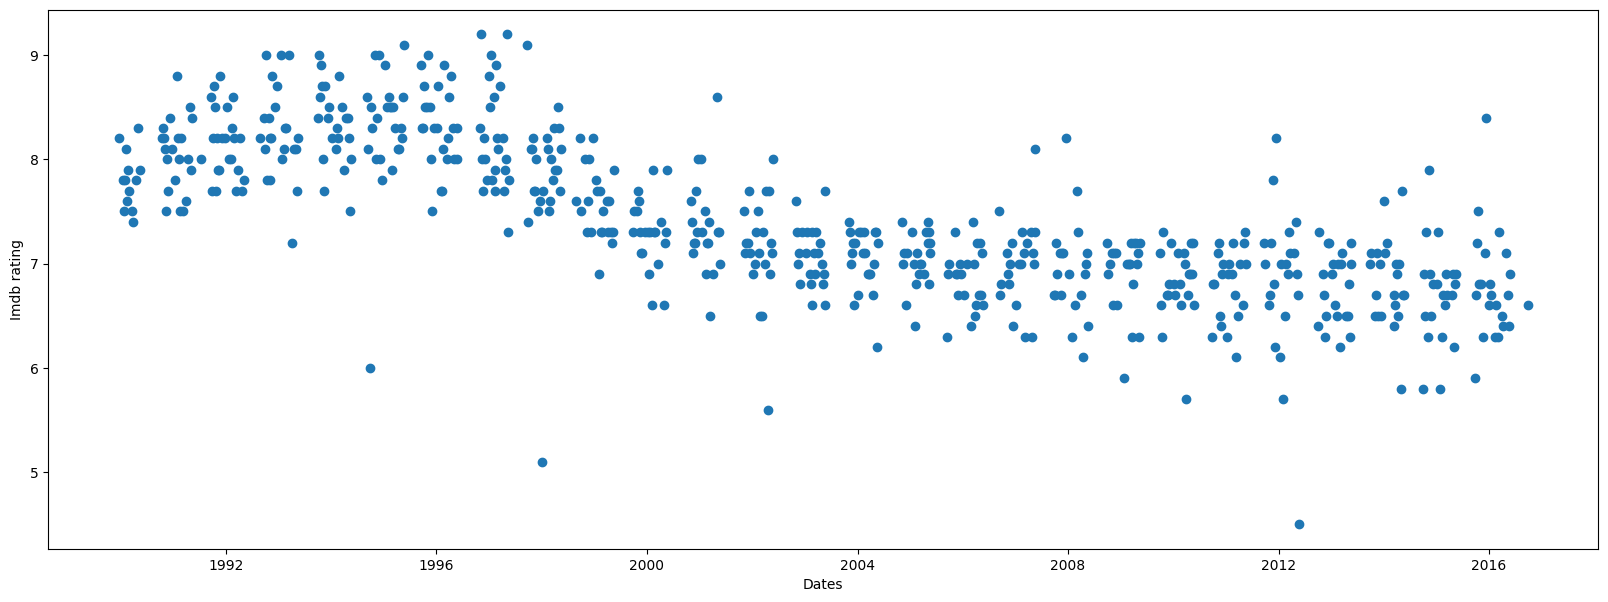

In [5]:
plt.figure(figsize=(20, 7))

plt.scatter(episodes['datetime'], episodes['imdb_rating'])
plt.xlabel('Dates')
plt.ylabel('Imdb rating')

## Vizualizacija dviju varijabli, kontinuiranih i kategoričkih

- Razmotrimo IMDB rating i US views kroz godine i sezone emitiranja
- Prikazat ćemo barplot, boxplot i violinplot. Seaborn nudi mnogo više uvjerljivih vizualizacija. Bacite oko na primjere: https://seaborn.pydata.org/examples/index.html

<AxesSubplot: xlabel='datetime_year', ylabel='imdb_rating'>

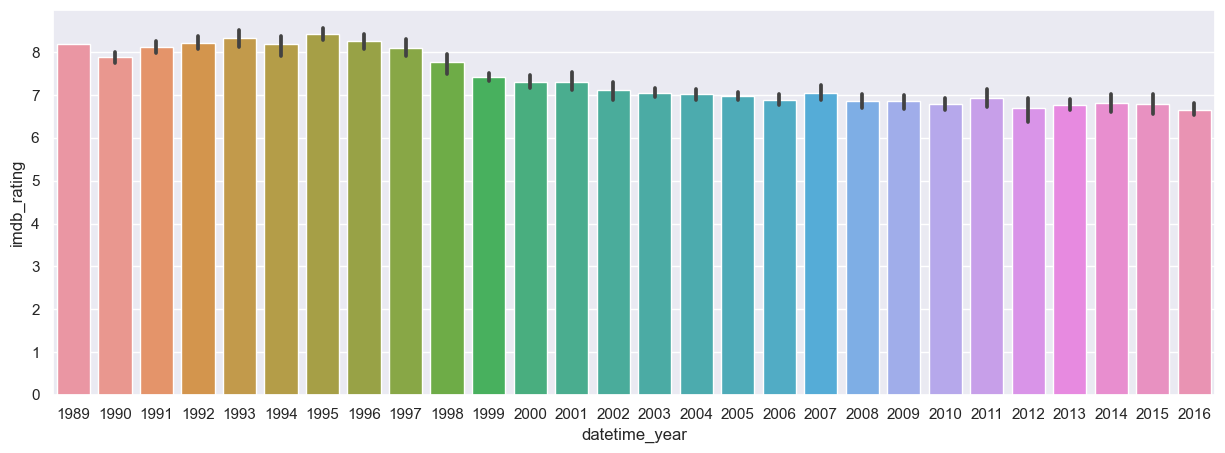

In [6]:
# barplot
sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data=episodes, x=episodes['datetime_year'], y=episodes['imdb_rating'])

<AxesSubplot: xlabel='datetime_year', ylabel='us_viewers_in_millions'>

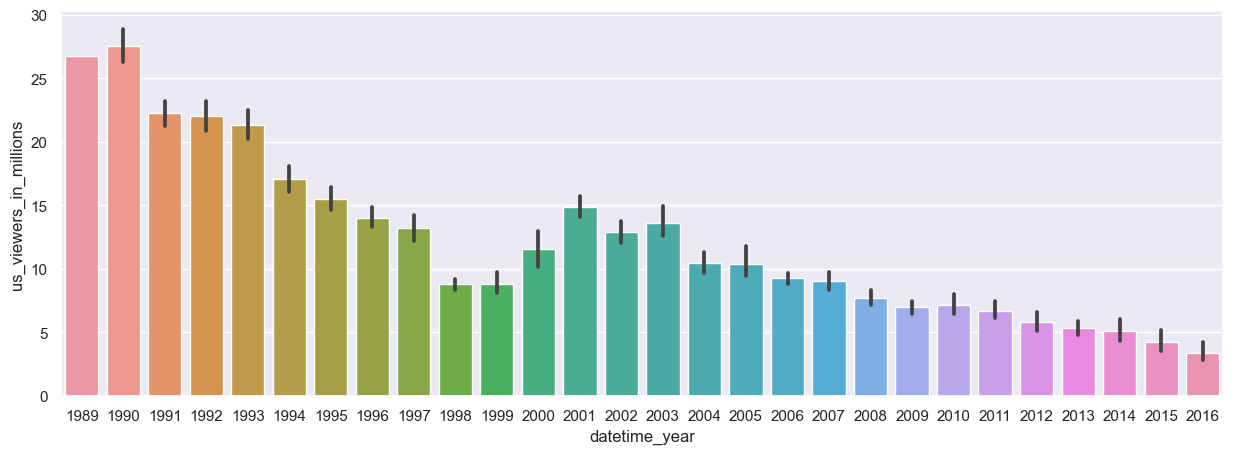

In [7]:
sns.barplot(data=episodes, x=episodes['datetime_year'], y=episodes['us_viewers_in_millions'])

<AxesSubplot: xlabel='datetime_year', ylabel='imdb_rating'>

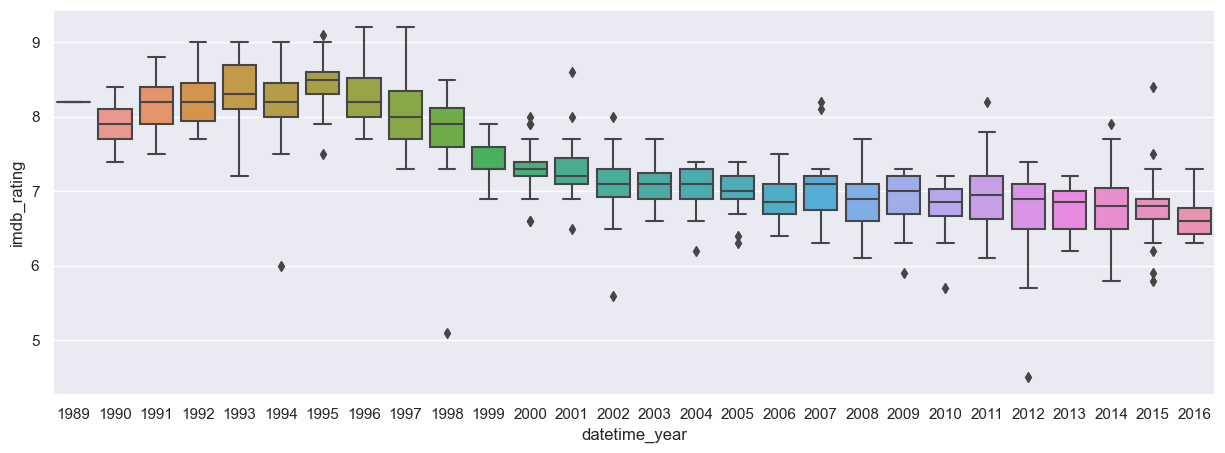

In [8]:
# boxplot
sns.boxplot(data=episodes, x=episodes['datetime_year'], y=episodes['imdb_rating'])

<AxesSubplot: xlabel='datetime_year', ylabel='us_viewers_in_millions'>

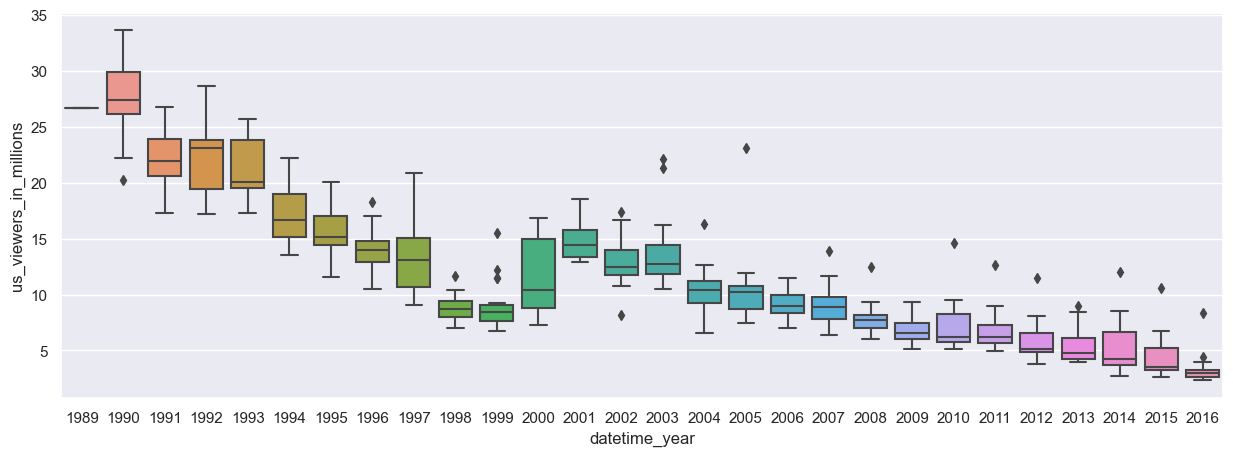

In [9]:
sns.boxplot(data=episodes, x=episodes['datetime_year'], y=episodes['us_viewers_in_millions'])

<AxesSubplot: xlabel='datetime_year', ylabel='imdb_rating'>

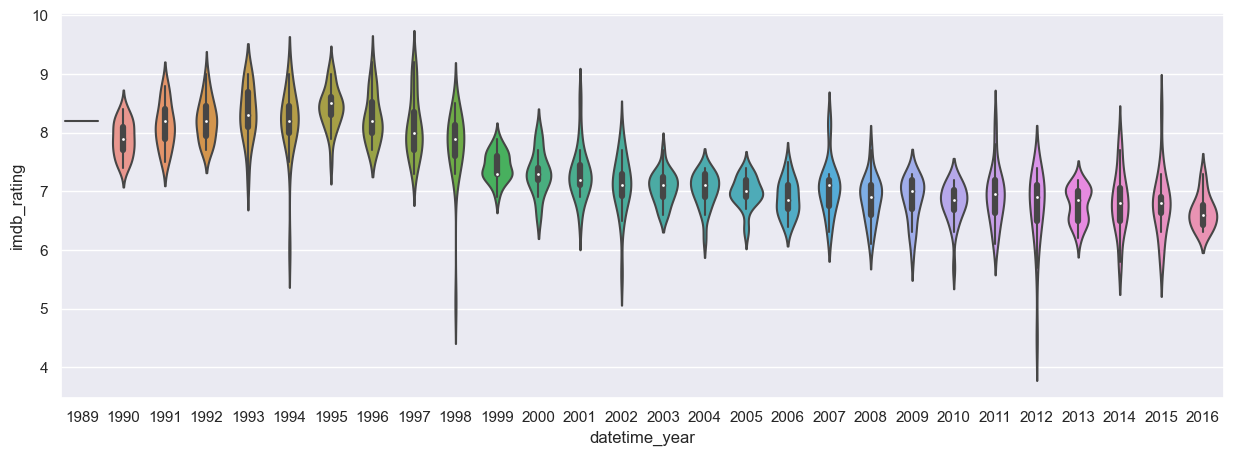

In [10]:
# violinplot
sns.violinplot(data=episodes, x=episodes['datetime_year'], y=episodes['imdb_rating'])

<AxesSubplot: xlabel='datetime_year', ylabel='us_viewers_in_millions'>

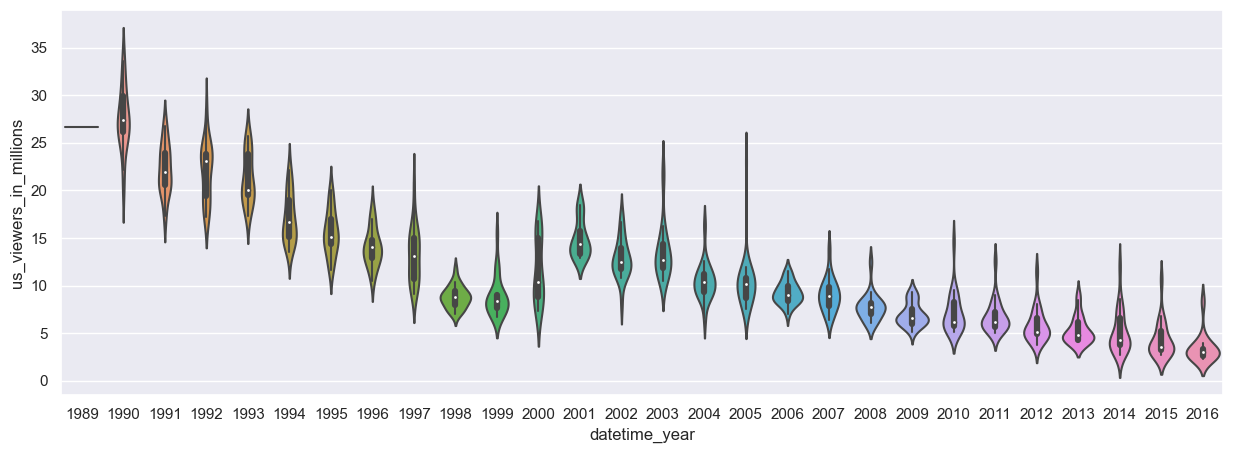

In [11]:
sns.violinplot(data=episodes, x=episodes['datetime_year'], y=episodes['us_viewers_in_millions'])

# 2. Vježbe: Izrada naprednijih vizualizacija

Da bismo napravili dobru vizualizaciju podataka, prvo trebamo imati jasnu ideju o tome što želimo vizualizirati! Objedinjujemo li podatke i kako? Koja bi količina trebala biti na različitim osima? Kako koristiti boje i veličine predmeta? Često pomaže ručno skicirati vizualizaciju prije nego što je kodirate.

U sljedećoj vježbi dobit ćete opise vizualizacija koje bi mogle biti korisne za razumijevanje skupa podataka o filmovima.

## 2.1 Heatmape

- Vizualizirajte IMDB i US views kroz sezone te koristite funkciju Seaborn heatmap te funkciju *pivot* of pandasa

- Konačno, heatmapom možemo predstaviti tri varijable, kodiranjem treće varijable bojom. Pokažite kako sa sezonom opada IMDB ocjena i US views korištenjem heatmape


<AxesSubplot: xlabel='season', ylabel='imdb_rating'>

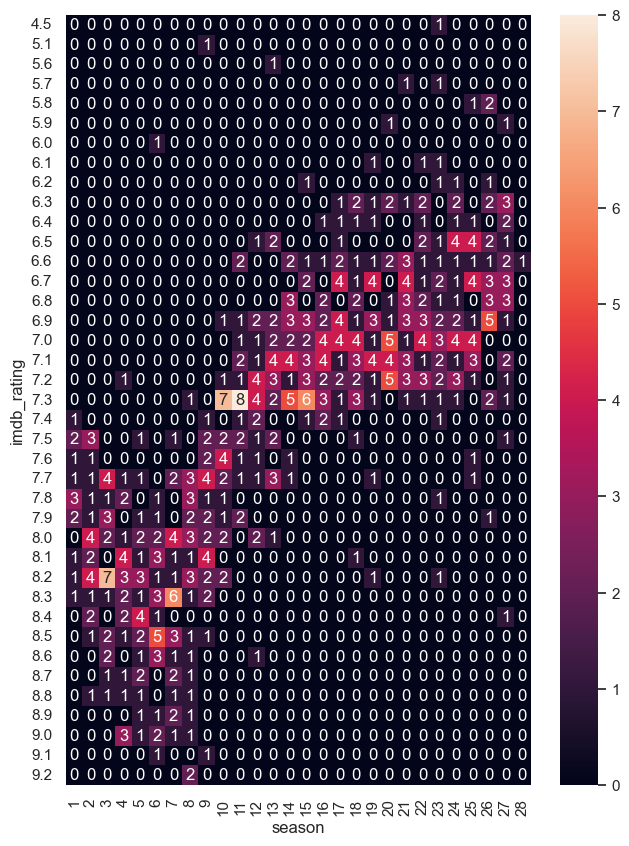

In [12]:
# Napišite svoj kod ovdje da biste kreirali prvu heatmapu
sns.set(rc={'figure.figsize':(7.5,10)})
sns.heatmap(pd.crosstab(episodes['imdb_rating'], episodes['season']), annot=True)

<AxesSubplot: xlabel='season', ylabel='us_viewers_in_millions'>

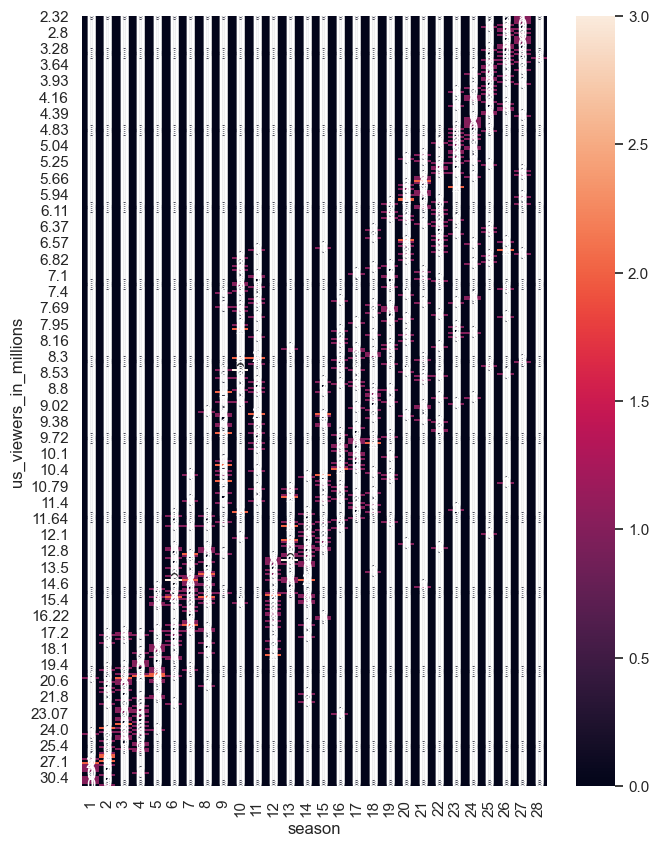

In [13]:
sns.heatmap(pd.crosstab( episodes['us_viewers_in_millions'], episodes['season'],), annot=True)

# Napišite svoj kod ovdje da biste kreirali drugu heatmapu


/var/folders/c_/64fgjwzx5rn2ryqkd_dzmh540000gn/T/ipykernel_1882/1637436561.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data.pivot('number_in_season', 'season', 'imdb_rating'), annot=True)


<AxesSubplot: xlabel='season', ylabel='number_in_season'>

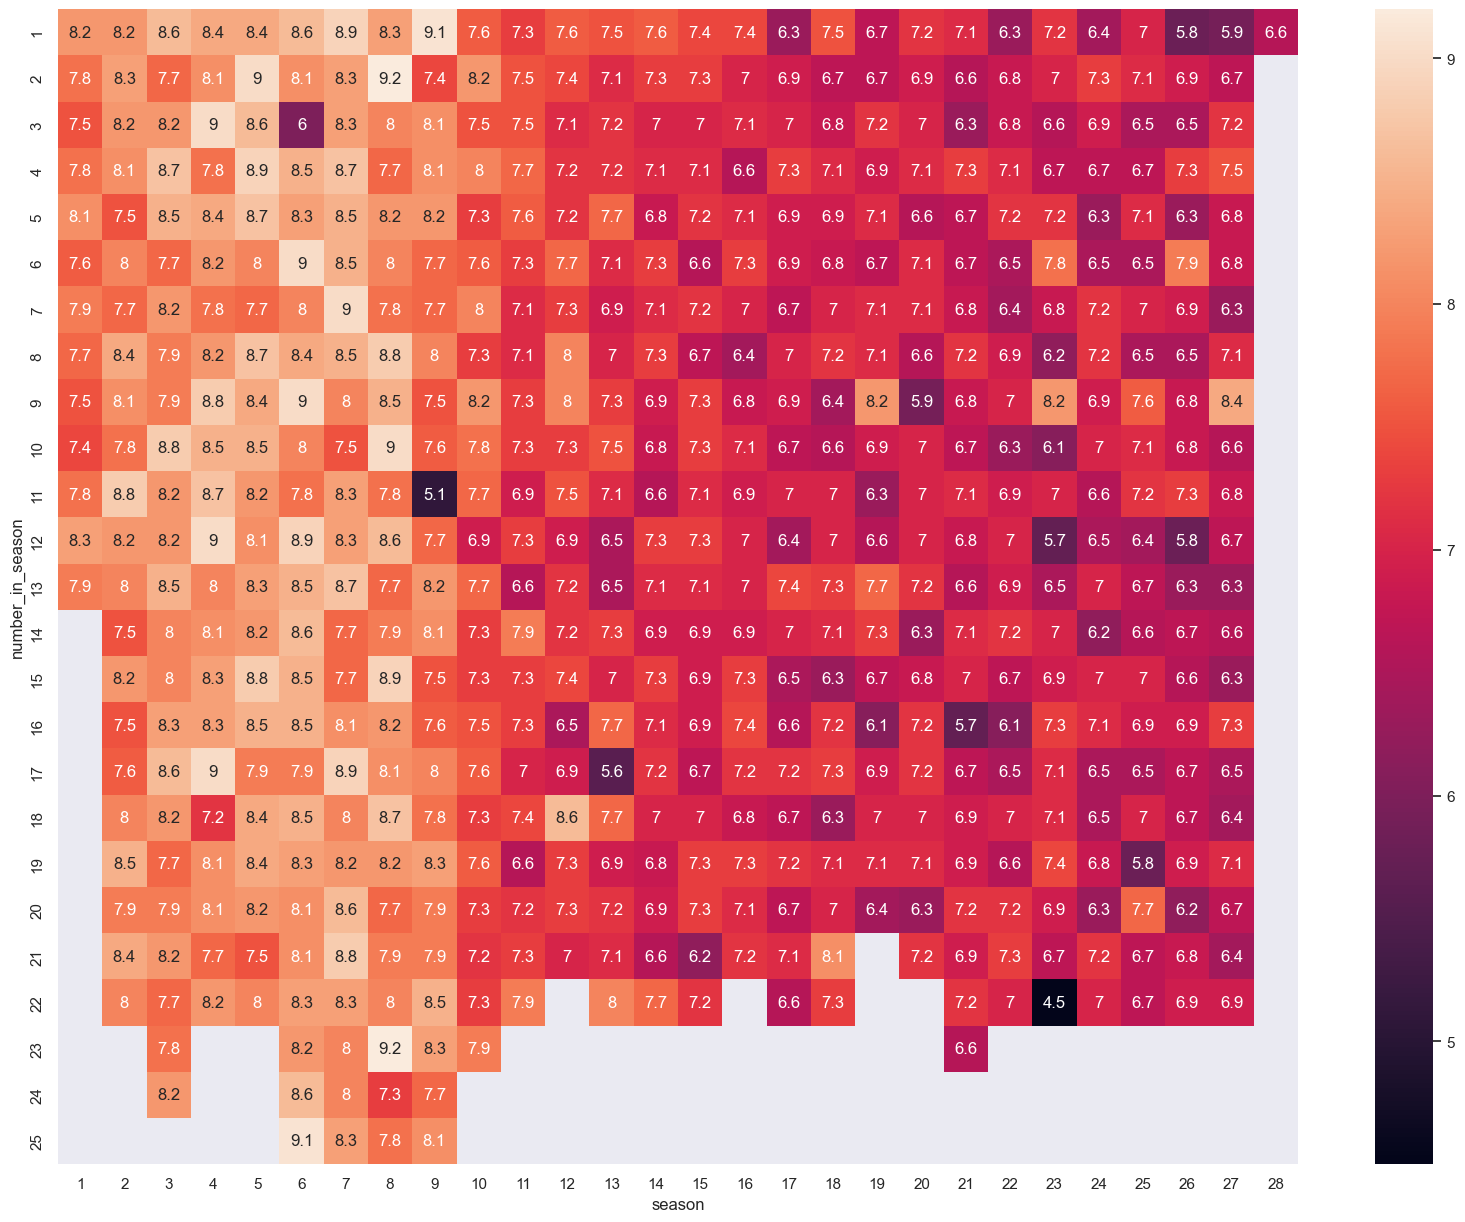

In [14]:
sns.set(rc={'figure.figsize':(20,15)})
data = episodes[['number_in_season', 'season', 'imdb_rating']]

sns.heatmap(data.pivot('number_in_season', 'season', 'imdb_rating'), annot=True)

/var/folders/c_/64fgjwzx5rn2ryqkd_dzmh540000gn/T/ipykernel_1882/3021724862.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(data.pivot('number_in_season', 'season', 'us_viewers_in_millions'), annot=True)


<AxesSubplot: xlabel='season', ylabel='number_in_season'>

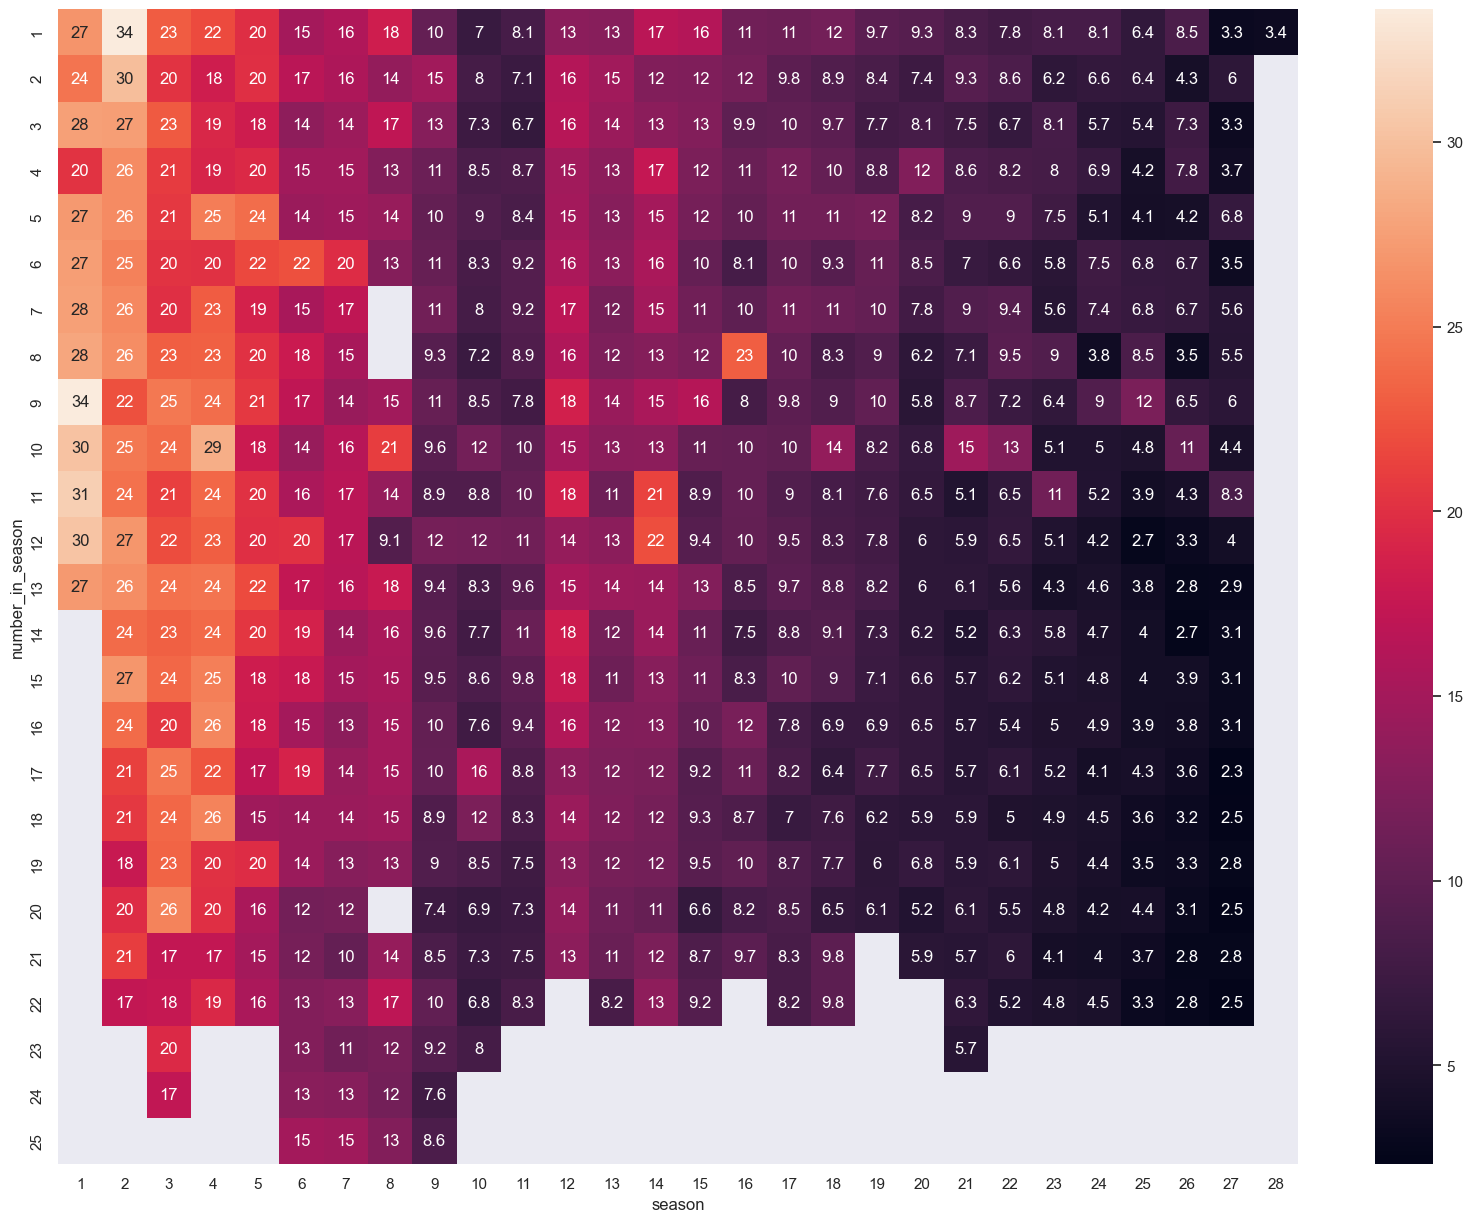

In [15]:
data = episodes[['number_in_season', 'season', 'us_viewers_in_millions']]

sns.heatmap(data.pivot('number_in_season', 'season', 'us_viewers_in_millions'), annot=True)